# Bank credit scoring

In this project, I will develop a Machine Learning model to help a bank decides if a **loan** should be granted or not using a supervised learning method using classification.
This is the **pipeline** used for this project:                         
>
**1.    Business understanding**
>
**2.    Data collection & understanding**
>
**3.    Data cleaning**
>
**4.    EDA - Exploratory Data Analysis**
>
**5.    Data pre-processing**
>
**6.    Modelling**
>
**7.    Evaluation**
>
**8.    Deployment**
>

 In this actual notebook, i will perform the steps 1-4, more focused on **Exploratory Data Analysis(EDA)**. In the other notebook I will work on steps 5-8 mode focused in **modelling**.
 
 - The main objective here is to understanding our dataset and get some insights about it. From there, we will have some understanding about our actual situation and what we should perform in the Dataset

## 1.0   -   Business Understanding

Follow this official description at the competition on [Kaggle](https://www.kaggle.com/c/GiveMeSomeCredit):  
>
"Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 
Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. "
- **1.1 Problem context**
-   Imagine you are a bank owner that recently opened this business. Among other banking problems (such as a management system, security system, etc.), you notice that your bank is offering loans to people who are not paying their debts properly.
In addition, employees are offering them credit limits that are far above normal when compared to their monthly income. 
So, you decide to hire a general team of Data Scientists/Machine learning who are offering a credit analysis system to decide if a loan should be granted or not. So, for now, you are the bank owner and I'm in the development team :). My team's task is to develop a model from the provided dataset and send it to another team to link the system itself to the model
- **Project objectives:**
- Build a model that has satisfactory accuracy in whether or not to offer loans correctly to customers
- Offer plans for the bank to reduce the 

In [1]:
import matplotlib.pyplot as plt # type: ignore
import  numpy as np# type: ignore
import  pandas as pd# type: ignore
import os
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import normalize# type: ignore
from sklearn.ensemble import RandomForestClassifier# type: ignore
from sklearn.metrics import accuracy_score# type: ignore
from sklearn.neighbors import KNeighborsClassifier# type: ignore
from sklearn import metrics# type: ignore
import seaborn as sns# type: ignore

from imblearn.over_sampling import RandomOverSampler# type: ignore
import random
import tensorflow as tf# type: ignore

sns.set_theme(style="ticks")
sns.set_palette("viridis")
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

## *2.0* DATA COLLECTION & UNDERSTANDING

In [2]:

df_data= pd.read_csv(os.path.join('..', 'data', 'cs-training.csv'))
df_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
df_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


### Data Types

In [4]:
df_data.info()      #note Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### Check NA

In [5]:
df_data.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

### 3.0 Data Cleaning / FEATURE ENGINEERING

> This specific dataset already has each feature properly categorized (in raw tasks we will hardly find datasets like this). Therefore, tasks with Label Encoder can already be found

In [6]:
df_data.rename(columns={"Unnamed: 0": "ID",
                          "RevolvingUtilizationOfUnsecuredLines": "balance_divided_creditlimit", 
                         "NumberOfTime60-89DaysPastDueNotWorse": "number_times_latepay60-89"}, inplace=True)



In [7]:
#dropping rows that contain NA values
df_data.dropna(inplace=True)

#### Outliers

In [8]:
df_data= df_data[df_data['age'] >=18 ]

#Excluding people who have < 18 years

df_data= df_data[df_data['NumberOfTime30-59DaysPastDueNotWorse']<96  ]

### SPLITTING THE DATA

In [9]:
# Defining X and Y
garbage_columns= ["ID","SeriousDlqin2yrs", "NumberOfTime30-59DaysPastDueNotWorse"]

X_train, X_test, y_train, y_test = train_test_split( df_data.drop(garbage_columns, axis=1), df_data["SeriousDlqin2yrs"], test_size=0.2)
df_data = df_data.drop(garbage_columns, axis=1, inplace=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(96096, 9) (24024, 9) (96096,) (24024,)


#### Cheking the targets

c:\Users\Erika Magalhães\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


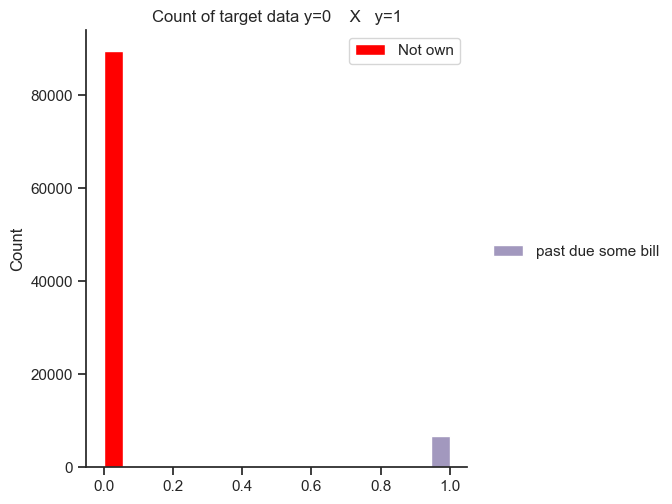

In [10]:

parta_data= pd.DataFrame({'past due some bill': y_train.values})
g= sns.displot(parta_data)
bars = g.ax.patches
bars[0].set_facecolor('red')
plt.legend(['Not own'])
plt.title('Count of target data y=0    X   y=1')
plt.show()

In [11]:
def overSampling(X, y):

    ros = RandomOverSampler(random_state=0)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    
    return X_resampled, y_resampled



X_train, y_train = overSampling(X_train, y_train)
X_test, y_test= overSampling(X_test, y_test)

y_counts= y_train.value_counts()
resampledDf= pd.DataFrame({'CLASS 0': y_counts[0], 'CLASS 1': y_counts[1]}, index=['QUANTITY EACH CLASS'])
resampledDf

,CLASS 0,CLASS 1
QUANTITY EACH CLASS,89481,89481


In [12]:
X_train.head()

,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
0,0.239576,29,0.377339,3900.0,10,0,2,0,0.0
1,0.217812,47,0.474478,2252.0,8,0,0,0,1.0
2,0.143581,49,0.109937,3028.0,8,0,0,0,4.0
3,0.105290,61,1.184064,3400.0,9,0,2,0,0.0
4,0.006006,45,0.346501,12833.0,6,0,1,0,2.0


## 3.0  EDA - Exploratory Data Analysis

## 3.0 - DATA CLEANING

### 3.1 GENERAL INFORMATIONS

In [ ]:
df_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


###  Data Types

In [ ]:
df_data.info()      #note Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### Check NA

In [ ]:
df_data.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

### 3.2 FEATURE ENGINEERING

> This specific dataset already has each feature almost properly categorized (in raw tasks we will hardly find datasets like this). Therefore, tasks with Label Encoder can already be found

In [ ]:
df_data.rename(columns={"Unnamed: 0": "ID",
                          "RevolvingUtilizationOfUnsecuredLines": "balance_divided_creditlimit", 
                         "NumberOfTime60-89DaysPastDueNotWorse": "number_times_latepay60-89"}, inplace=True)



In [ ]:
#dropping rows that contain NA values
df_data.dropna(inplace=True)

#### Outliers


In [ ]:
df_data= df_data[df_data['age'] >=18 ]

#Excluding people who have < 18 years

df_data= df_data[df_data['NumberOfTime30-59DaysPastDueNotWorse']<96  ]


####  SPLITTING THE DATA

In [ ]:
# Defining X and Y
garbage_columns= ["ID","SeriousDlqin2yrs", "NumberOfTime30-59DaysPastDueNotWorse"]
X_train, X_test, y_train, y_test = train_test_split( df_data.drop(garbage_columns, axis=1), df_data["SeriousDlqin2yrs"], test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(96096, 9) (24024, 9) (96096,) (24024,)


In [ ]:
X_train.head()

,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
145775,0.085396,60,6.053892,500.0,10,0,2,0,0.0
8721,3383.000000,31,0.096226,4000.0,3,0,0,0,0.0
36627,0.127077,37,0.274961,7000.0,6,0,0,0,3.0
140740,0.006468,47,0.479913,5500.0,13,0,2,0,2.0
32965,0.626757,67,0.561275,5205.0,8,0,2,0,0.0


####  Balancing the targets 

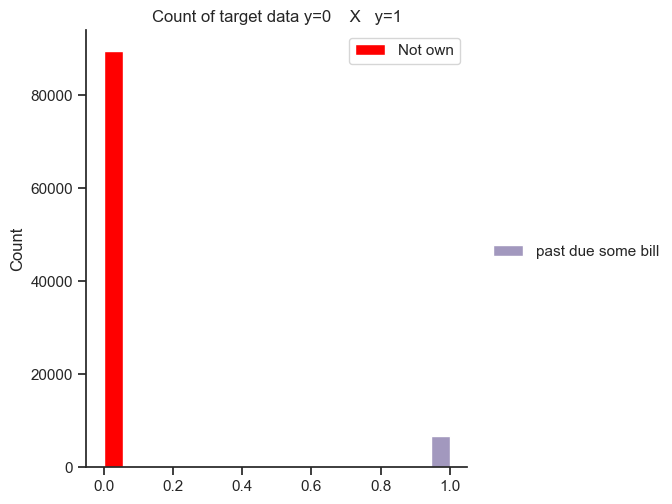

In [ ]:
parta_data= pd.DataFrame({'past due some bill': y_train.values})
g= sns.displot(parta_data)
bars = g.ax.patches
bars[0].set_facecolor('red')
plt.legend(['Not own'])
plt.title('Count of target data y=0    X   y=1')
plt.show()


In [ ]:
def overSampling(X, y):

    ros = RandomOverSampler(random_state=0)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    
    return X_resampled, y_resampled



X_train, y_train = overSampling(X_train, y_train)
X_test, y_test= overSampling(X_test, y_test)

y_counts= y_train.value_counts()
resampledDf= pd.DataFrame({'CLASS 0': y_counts[0], 'CLASS 1': y_counts[1]}, index=['QUANTITY EACH CLASS'])
resampledDf

,CLASS 0,CLASS 1
QUANTITY EACH CLASS,89426,89426


#### 3.1   -   General plots

array([[<Axes: title={'center': 'balance_divided_creditlimit'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'DebtRatio'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumberOfOpenCreditLinesAndLoans'}>,
        <Axes: title={'center': 'NumberOfTimes90DaysLate'}>],
       [<Axes: title={'center': 'NumberRealEstateLoansOrLines'}>,
        <Axes: title={'center': 'number_times_latepay60-89'}>,
        <Axes: title={'center': 'NumberOfDependents'}>]], dtype=object)

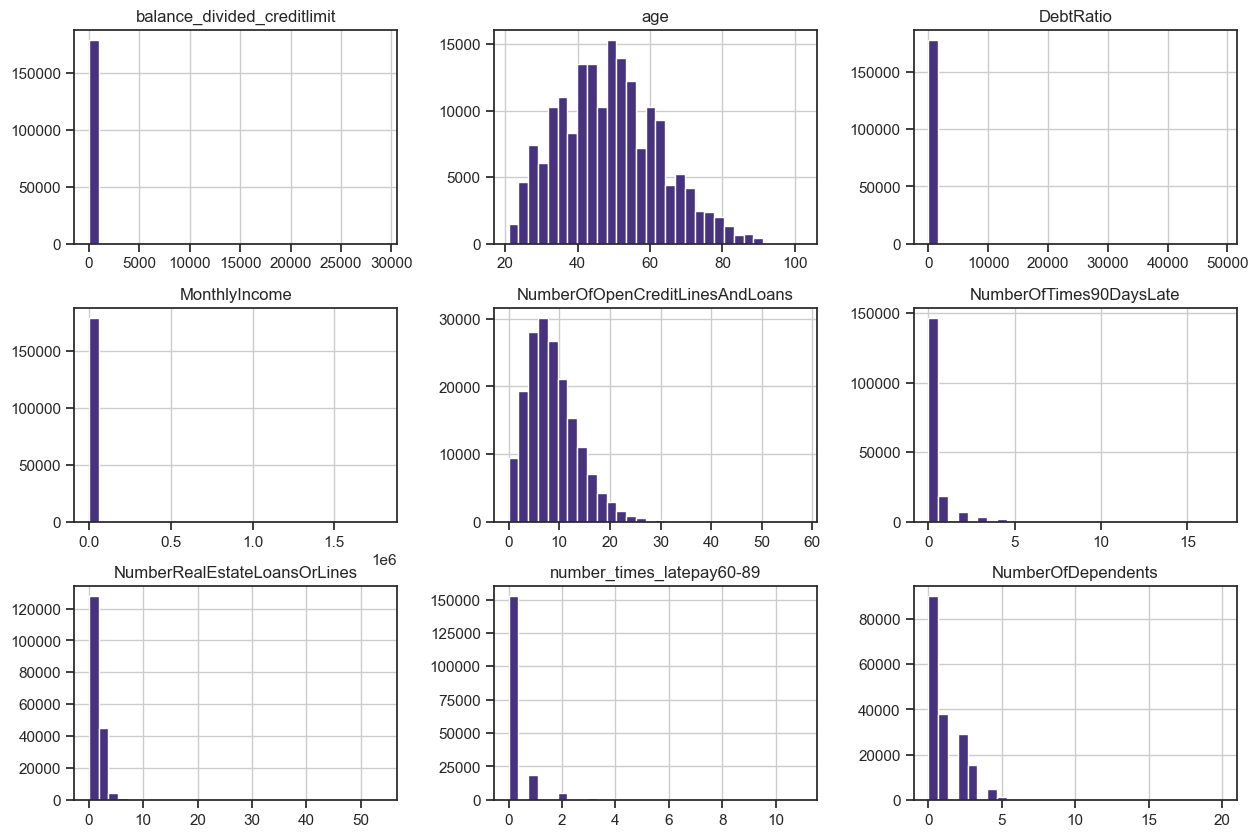

In [97]:
X_train[:].hist(figsize=(15,10), bins=30)

#### 3.2 - Correlation heat map using Pearson method

<Axes: >

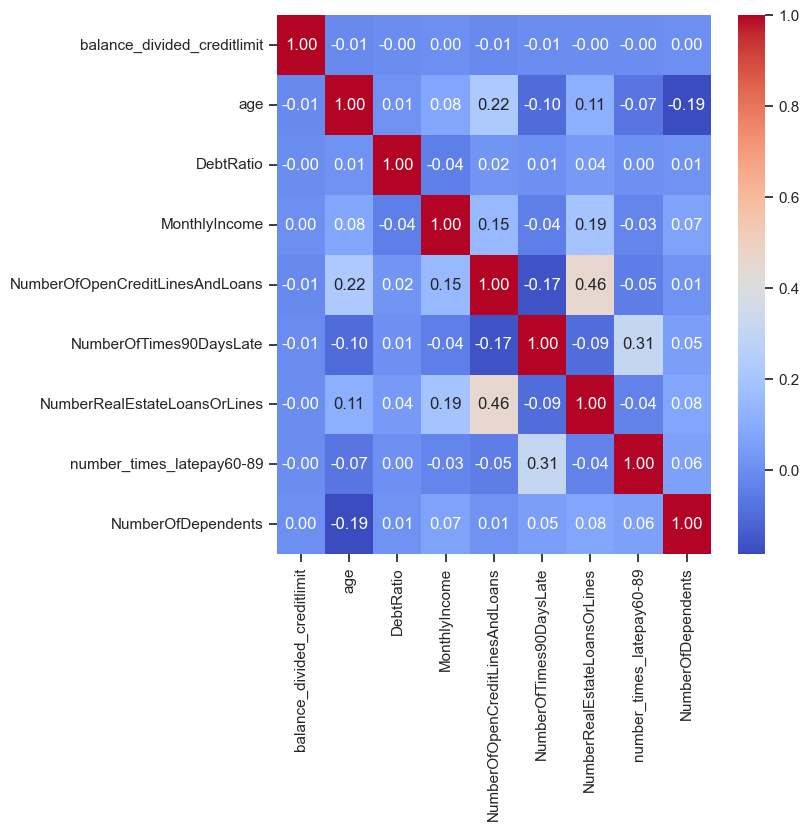

In [98]:
plt.figure(figsize=(7,7))
sns.heatmap(X_train.corr(method='pearson'), annot=True, cmap='coolwarm',  fmt='.2f')
#Detecting correlations

##### 3.2.1 Vizualizing sort of correlations betweeen features

Text(0.5, 1.0, 'Bad Correlation')

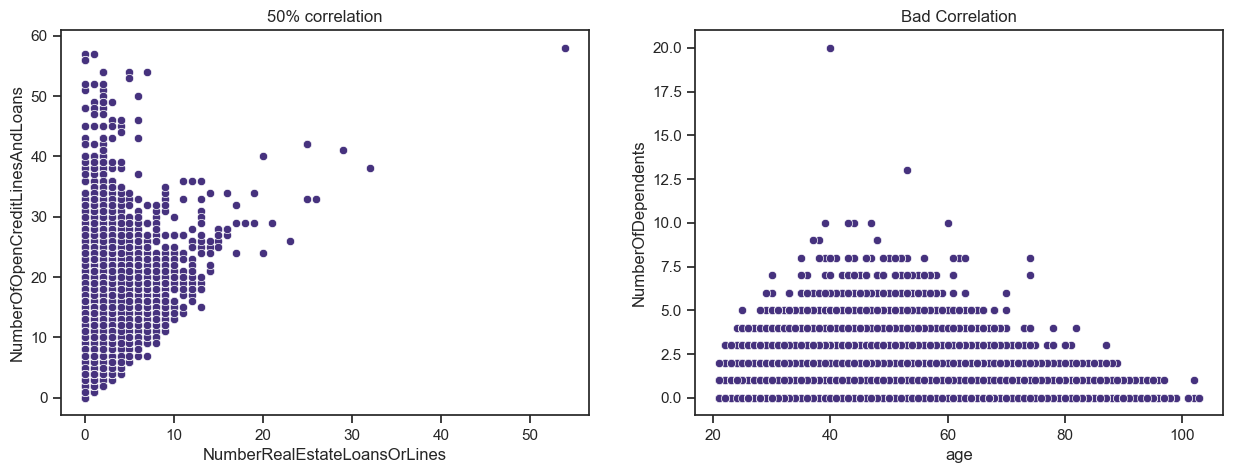

In [72]:
fig, axs =plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x=df_data['NumberRealEstateLoansOrLines'], y=df_data['NumberOfOpenCreditLinesAndLoans'],ax=axs[0])
axs[0].set_title('50% correlation')
sns.scatterplot(x=df_data['age'], y=df_data['NumberOfDependents'],ax=axs[1])
axs[1].set_title('Bad Correlation')

#### 3.3   -   Debt Ratio ㅤ       X       ㅤ Age

-   Young people seems to has less free money than olders

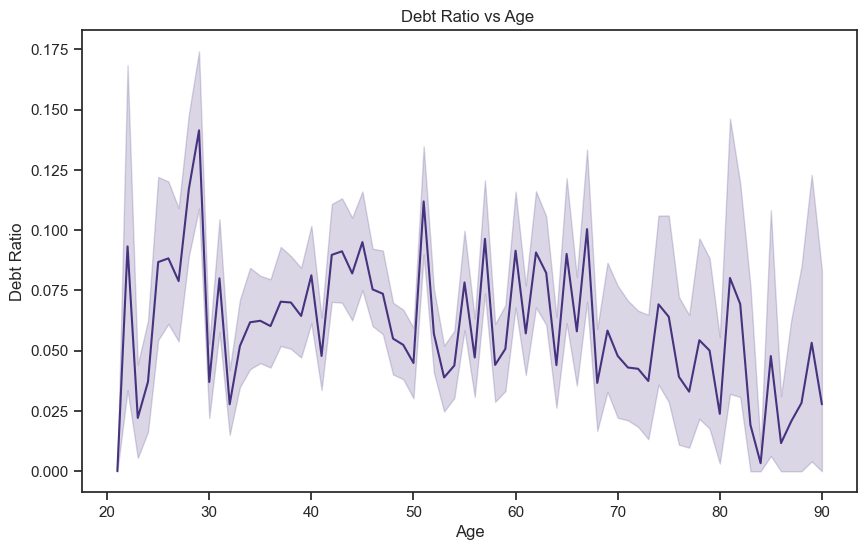

In [73]:

def debtDivided(value):
    if value >=0 and value<25:
        return 0   
    if  value>= 25.0 and value<50.0:
        return 1
    elif value >= 50.0 and value < 100.0:
        return 2
    elif value >=100 and value < 150.0:
        return 3
    elif value>=150 and value <200:
        return  4
    elif value>=200 and value <400:
        return 5
    else:
        return 6
    
particioned_data_2= X_train.iloc[:,2].apply(debtDivided)


particioned_data_2= pd.DataFrame(particioned_data_2)
particioned_data_2['Age']= X_train.iloc[:, 1]
particioned_data_2= particioned_data_2[particioned_data_2['Age'] <=90]      #removing extreme cases for better vizualization only



plt.figure(figsize=(10, 6))
sns.lineplot(data=particioned_data_2, x='Age', y='DebtRatio')

plt.xlabel('Age')
plt.ylabel('Debt Ratio')
plt.title('Debt Ratio vs Age ')
plt.show()


#### 3.4       -       Past due    ㅤ    X   ㅤ    Number of dependents
-  Quantity of number of dependents of people that past due = 1  ㅤ   Xㅤ   past due = 0

Text(0.5, 0, 'number of dependents when pastdue = 0')

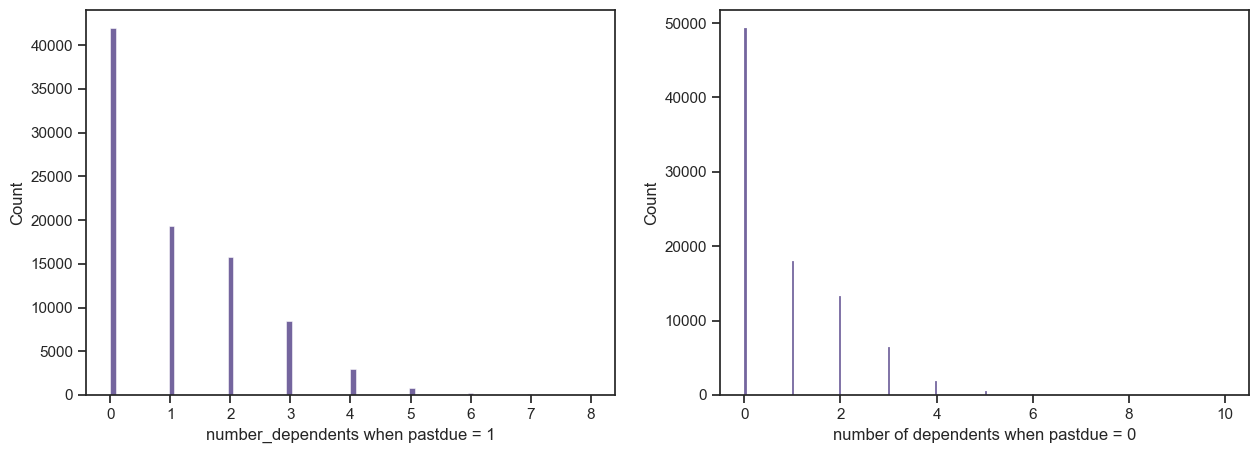

In [74]:

duedependents= pd.DataFrame()
due_to_0=      pd.DataFrame()
duedependents['number_dependents=1']= X_train.iloc[:, 8][y_train==1]
due_to_0['number_dependents_0']= X_train.iloc[:, 8][y_train==0]



fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(duedependents['number_dependents=1'], ax=axs[0])
axs[0].set_xlabel('number_dependents when pastdue = 1')
sns.histplot(due_to_0['number_dependents_0'], ax=axs[1], binrange=(0,10))
axs[1].set_xlabel('number of dependents when pastdue = 0')


#### 4.5       Balance of credit limit ÷ sum of credit limit       ㅤX        ㅤPast due

In [77]:
df_data

,ID,SeriousDlqin2yrs,balance_divided_creditlimit,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149994,149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_2440\1446117255.py:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(balancedue, x='pastdue', y='balance_creditlimit', hue='pastdue', palette=colors)


Text(0.5, 1.0, 'Balance÷sum creditlimit  X   Past due ')

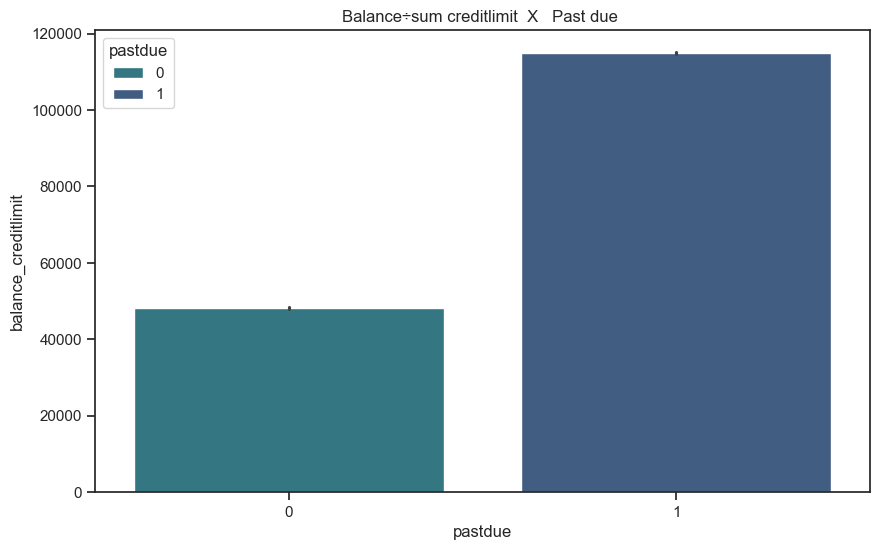

In [75]:
colors = sns.color_palette()
random.shuffle(colors)

balancedue= pd.DataFrame()
balancedue['balance_creditlimit'] = df_data.iloc[:, 0]
balancedue['pastdue']= y_train.iloc[:]
balancedue=balancedue.sort_index()


plt.figure(figsize=(10,6))
sns.barplot(balancedue, x='pastdue', y='balance_creditlimit', hue='pastdue', palette=colors)
plt.title('Balance÷sum creditlimit  X   Past due ')

### 4.6   -    Number of times people past due in last 2 years      ㅤX          ㅤCurrently has bills that are at least 90 days past due
> This can be considered a high valueable information, please check section 5.2

Text(0.5, 1.0, 'Number of times latepay 60-89 days  X   Past due in last 2 years')

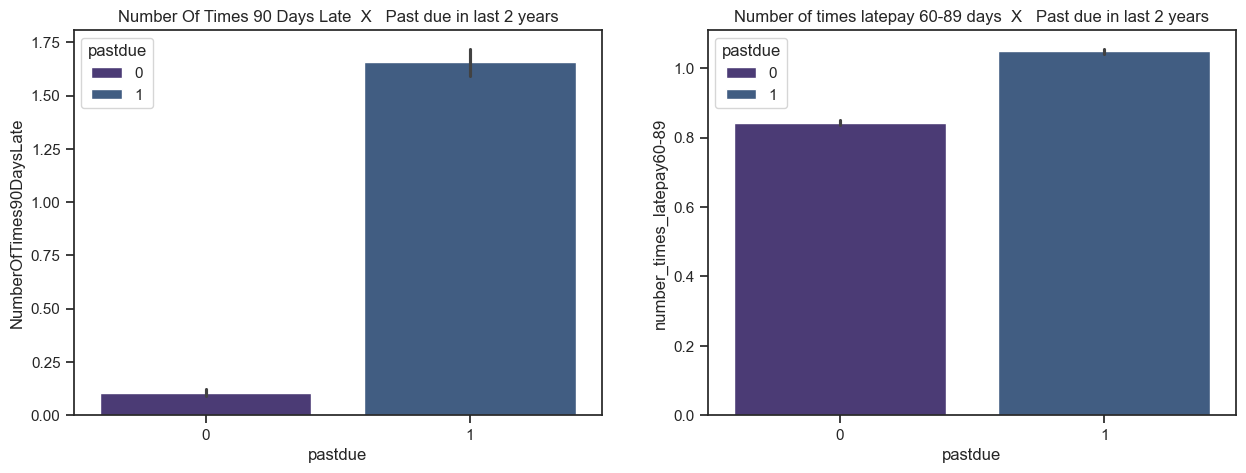

In [ ]:

df_recurring= pd.DataFrame()
df_recurring['NumberOfTimes90DaysLate']= X_train['NumberOfTimes90DaysLate']
df_recurring['pastdue']= y_train
df_recurring['number_times_latepay60-89']= X_train.iloc[:, 8]
colors = sns.color_palette("viridis", n_colors=df_recurring['pastdue'].nunique())

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(df_recurring, x='pastdue', y='NumberOfTimes90DaysLate', ax= axs[0], hue='pastdue')
axs[0].set_title('Number Of Times 90 Days Late  X   Past due in last 2 years')
sns.barplot(df_recurring, x='pastdue', y='number_times_latepay60-89', ax= axs[1], hue='pastdue')
axs[1].set_title('Number of times latepay 60-89 days  X   Past due in last 2 years')

#### 4.7   -    Have people who have income less than 5000 owed any bills that has been expired for at least 90 days in the last two years?     


C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_8708\2063580838.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  notpast=X_train[X_train['MonthlyIncome']<5400][y_train==0].shape[0]
C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_8708\2063580838.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  past=X_train[X_train['MonthlyIncome']<5400][y_train==1].shape[0]


Text(0, 0.5, 'Count')

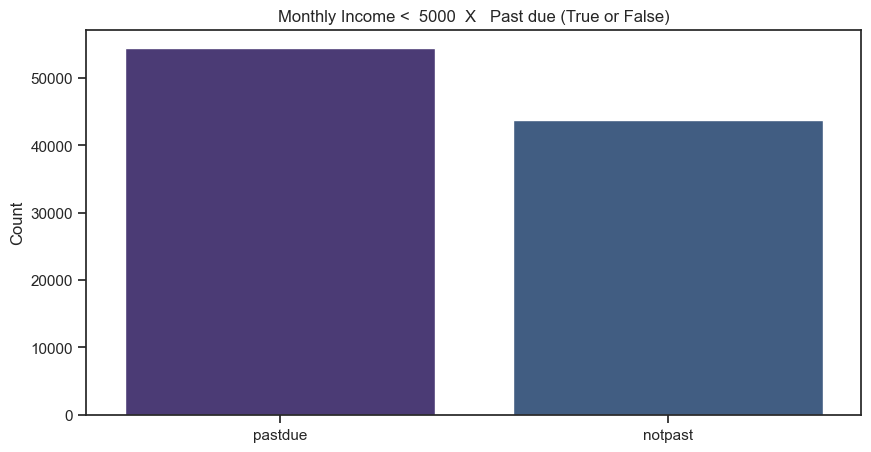

In [ ]:

notpast=X_train[X_train['MonthlyIncome']<5400][y_train==0].shape[0]
past=X_train[X_train['MonthlyIncome']<5400][y_train==1].shape[0]
income_past= pd.DataFrame({'pastdue': past, 'notpast': notpast}, index=['quantity'])
plt.figure(figsize=(10,5))
sns.barplot(income_past)
plt.title('Monthly Income <  5000  X   Past due (True or False)')
plt.ylabel('Count')


In [28]:
df_data= pd.read_csv(os.path.join('..','data', 'cs-training.csv'))
df_data.head()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 4.0 - DATA CLEANING

### 3.1 GENERAL INFORMATIONS

In [3]:
df_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


###  Data Types

In [159]:
df_data.info()      #note Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### Check NA

In [4]:
df_data.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

### 3.2 FEATURE ENGINEERING

> This specific dataset already has each feature almost properly categorized (in raw tasks we will hardly find datasets like this). Therefore, tasks with Label Encoder can already be found

In [29]:
df_data.rename(columns={"Unnamed: 0": "ID",
                          "RevolvingUtilizationOfUnsecuredLines": "balance_divided_creditlimit", 
                         "NumberOfTime60-89DaysPastDueNotWorse": "number_times_latepay60-89"}, inplace=True)



In [30]:
#dropping rows that contain NA values
df_data.dropna(inplace=True)

#### Outliers


In [31]:
df_data= df_data[df_data['age'] >=18 ]

#Excluding people who have < 18 years

df_data= df_data[df_data['NumberOfTime30-59DaysPastDueNotWorse']<96  ]


####  SPLITTING THE DATA

In [32]:
# Defining X and Y
garbage_columns= ["ID","SeriousDlqin2yrs", "NumberOfTime30-59DaysPastDueNotWorse"]
X_train, X_test, y_train, y_test = train_test_split( df_data.drop(garbage_columns, axis=1), df_data["SeriousDlqin2yrs"], test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(96096, 9) (24024, 9) (96096,) (24024,)


In [33]:
X_train.head()

,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
145775,0.085396,60,6.053892,500.0,10,0,2,0,0.0
8721,3383.000000,31,0.096226,4000.0,3,0,0,0,0.0
36627,0.127077,37,0.274961,7000.0,6,0,0,0,3.0
140740,0.006468,47,0.479913,5500.0,13,0,2,0,2.0
32965,0.626757,67,0.561275,5205.0,8,0,2,0,0.0


####  Target distribution

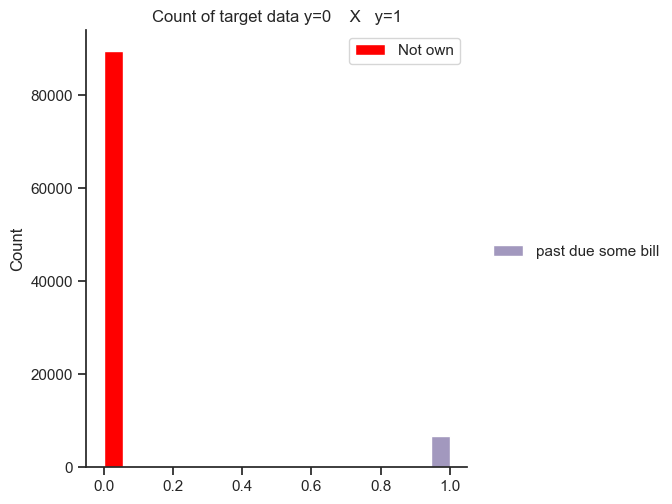

In [34]:
parta_data= pd.DataFrame({'past due some bill': y_train.values})
g= sns.displot(parta_data)
bars = g.ax.patches
bars[0].set_facecolor('red')
plt.legend(['Not own'])
plt.title('Count of target data y=0    X   y=1')
plt.show()


In [35]:
def overSampling(X, y):

    ros = RandomOverSampler(random_state=0)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    
    return X_resampled, y_resampled



X_train, y_train = overSampling(X_train, y_train)
X_test, y_test= overSampling(X_test, y_test)

y_counts= y_train.value_counts()
resampledDf= pd.DataFrame({'CLASS 0': y_counts[0], 'CLASS 1': y_counts[1]}, index=['QUANTITY EACH CLASS'])
resampledDf

,CLASS 0,CLASS 1
QUANTITY EACH CLASS,89426,89426


#### 4.1   -   General plots

array([[<Axes: title={'center': 'balance_divided_creditlimit'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'DebtRatio'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumberOfOpenCreditLinesAndLoans'}>,
        <Axes: title={'center': 'NumberOfTimes90DaysLate'}>],
       [<Axes: title={'center': 'NumberRealEstateLoansOrLines'}>,
        <Axes: title={'center': 'number_times_latepay60-89'}>,
        <Axes: title={'center': 'NumberOfDependents'}>]], dtype=object)

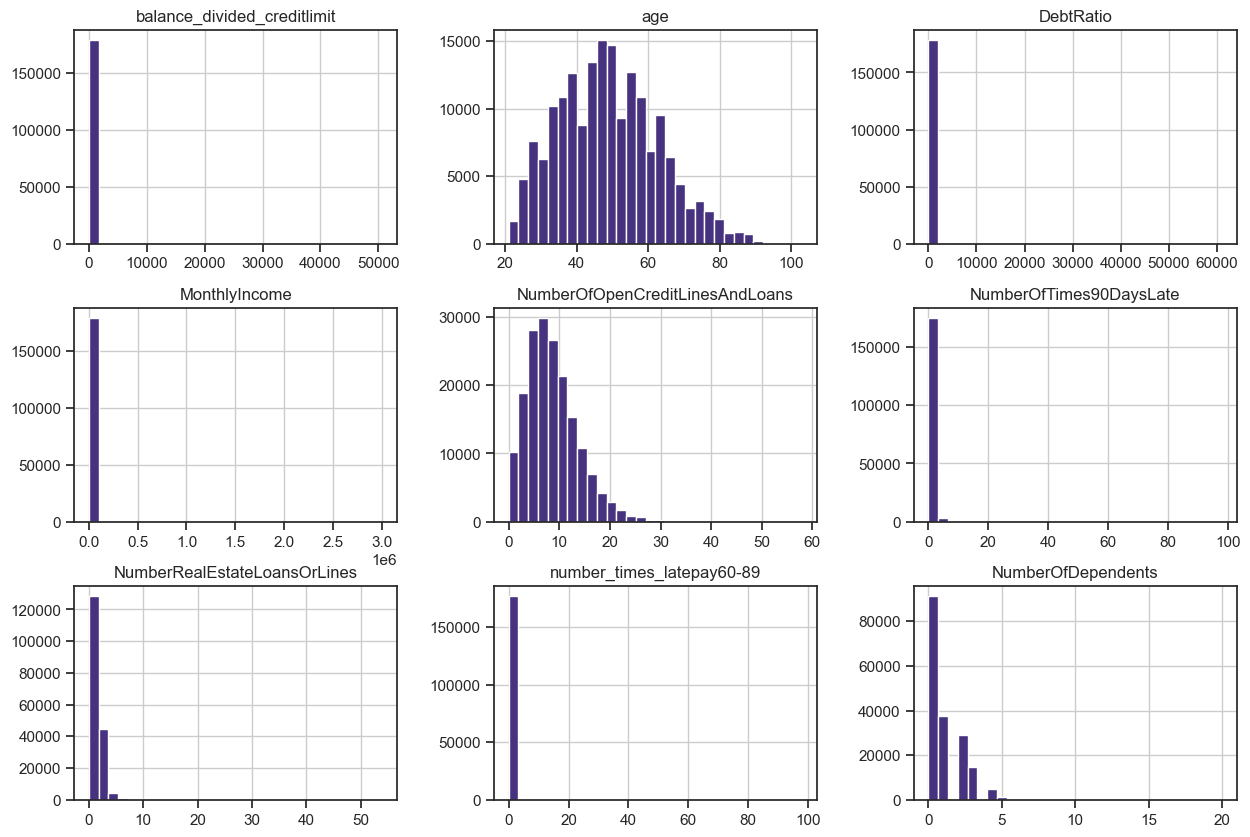

In [12]:
X_train[:].hist(figsize=(15,10), bins=30)

#### 4.2 - Correlation heat map using Pearson method

<Axes: >

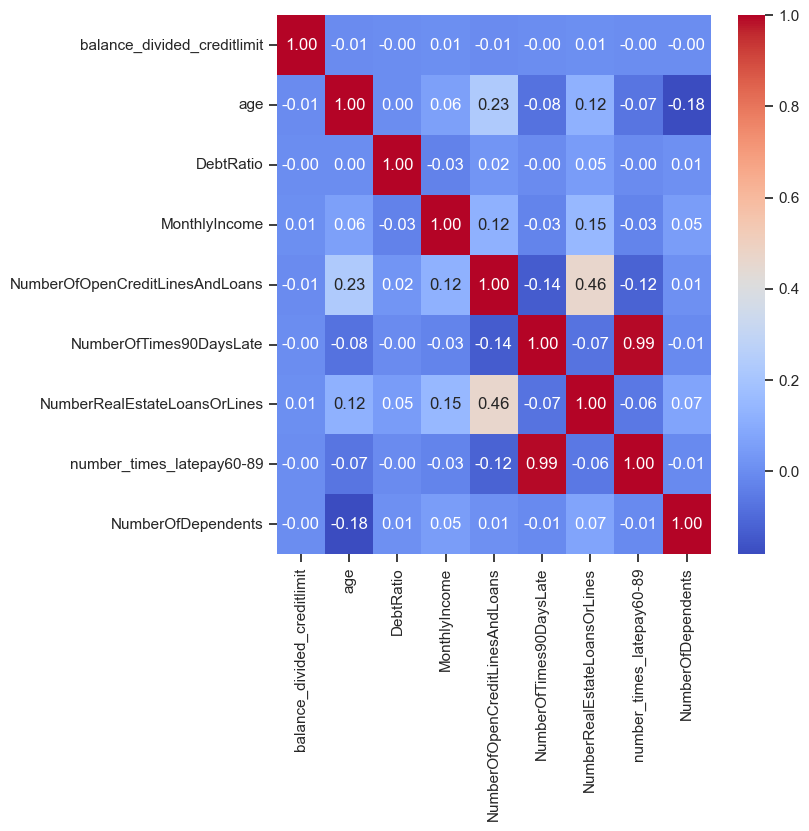

In [55]:
plt.figure(figsize=(7,7))
sns.heatmap(X_train.corr(method='pearson'), annot=True, cmap='coolwarm',  fmt='.2f')
#Detecting correlations

##### 4.2.1 Vizualizing sort of correlations betweeen features

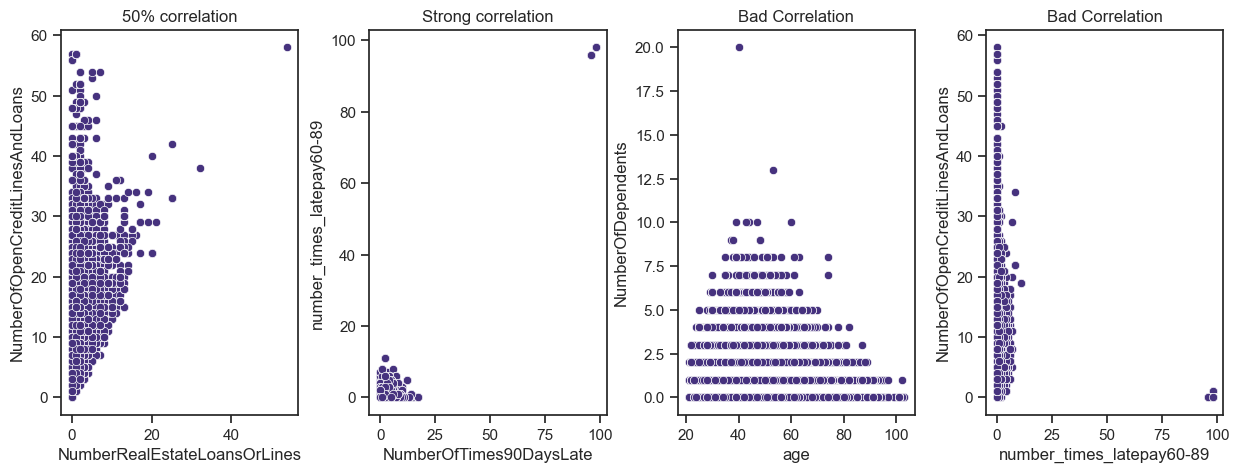

In [56]:
fig, axs =plt.subplots(1, 4, figsize=(15, 5))
sns.scatterplot(x=X_train['NumberRealEstateLoansOrLines'], y=X_train['NumberOfOpenCreditLinesAndLoans'],ax=axs[0])
axs[0].set_title('50% correlation')
sns.scatterplot(x=X_train['NumberOfTimes90DaysLate'], y=X_train['number_times_latepay60-89'],ax=axs[1])
axs[1].set_title('Strong correlation')
sns.scatterplot(x=X_train['age'], y=X_train['NumberOfDependents'],ax=axs[2])
axs[2].set_title('Bad Correlation')
sns.scatterplot(x=X_train['number_times_latepay60-89'], y=X_train['NumberOfOpenCreditLinesAndLoans'],ax=axs[3])
axs[3].set_title('Bad Correlation')
plt.subplots_adjust(wspace=0.3) 

#### 4.3   -   Debt Ratio ㅤ       X       ㅤ Age

-   Young people seems to has less free money than olders

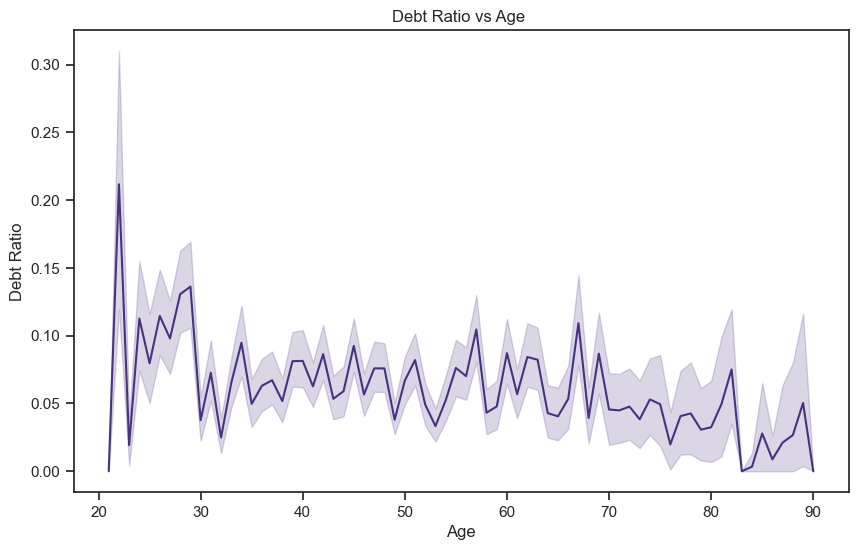

In [57]:

def debtDivided(value):
    if value >=0 and value<25:
        return 0   
    if  value>= 25.0 and value<50.0:
        return 1
    elif value >= 50.0 and value < 100.0:
        return 2
    elif value >=100 and value < 150.0:
        return 3
    elif value>=150 and value <200:
        return  4
    elif value>=200 and value <400:
        return 5
    else:
        return 6
    
particioned_data_2= X_train.iloc[:,2].apply(debtDivided)


particioned_data_2= pd.DataFrame(particioned_data_2)
particioned_data_2['Age']= X_train.iloc[:, 1]
particioned_data_2= particioned_data_2[particioned_data_2['Age'] <=90]      #removing extreme cases for better vizualization only



plt.figure(figsize=(10, 6))
sns.lineplot(data=particioned_data_2, x='Age', y='DebtRatio')

plt.xlabel('Age')
plt.ylabel('Debt Ratio')
plt.title('Debt Ratio vs Age ')
plt.show()


#### 4.4       -       Past due    ㅤ    X   ㅤ    Number of dependents
-  Quantity of number of dependents of people that past due = 1  ㅤ   Xㅤ   past due = 0

Text(0.5, 0, 'number of dependents when pastdue = 0')

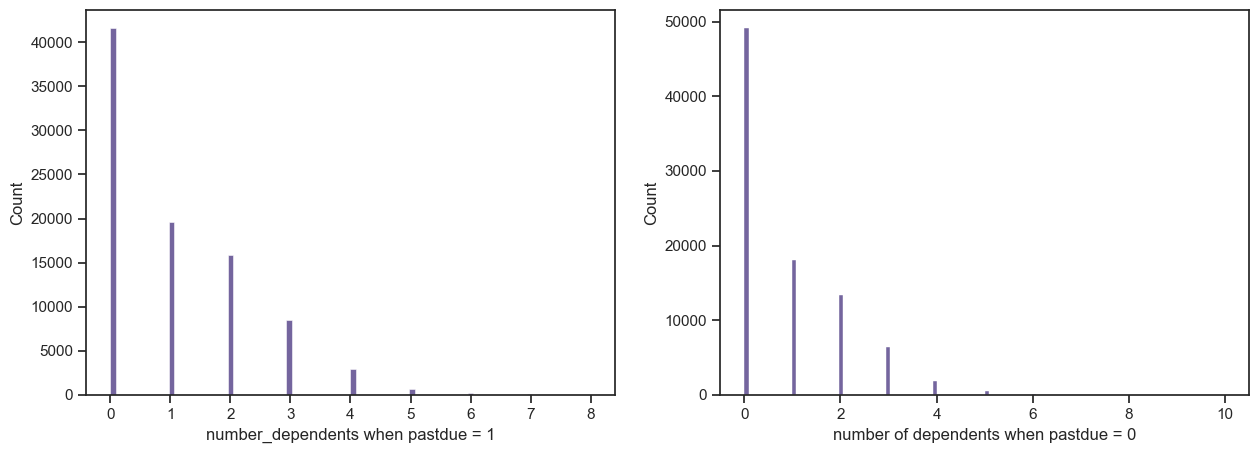

In [58]:

duedependents= pd.DataFrame()
due_to_0=      pd.DataFrame()
duedependents['number_dependents=1']= X_train.iloc[:, 8][y_train==1]
due_to_0['number_dependents_0']= X_train.iloc[:, 8][y_train==0]



fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(duedependents['number_dependents=1'], ax=axs[0])
axs[0].set_xlabel('number_dependents when pastdue = 1')
sns.histplot(due_to_0['number_dependents_0'], ax=axs[1], binrange=(0,10))
axs[1].set_xlabel('number of dependents when pastdue = 0')


#### 4.5       Balance of credit limit ÷ sum of credit limit       ㅤX        ㅤPast due

C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_8708\2710262629.py:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(balancedue, x='pastdue', y='balance_creditlimit', hue='pastdue', palette=colors)


Text(0.5, 1.0, 'Balance÷sum creditlimit  X   Past due ')

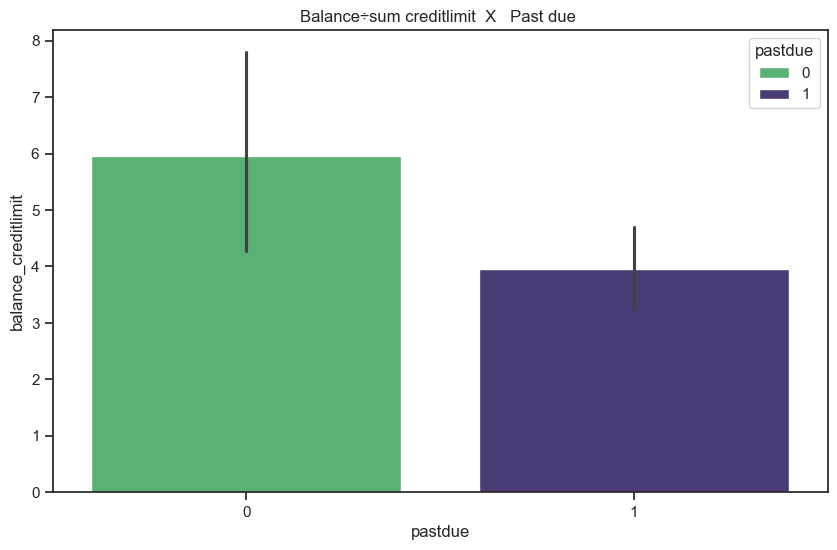

In [59]:
colors = sns.color_palette()
random.shuffle(colors)

balancedue= pd.DataFrame()
balancedue['balance_creditlimit'] = X_train.iloc[:, 0]
balancedue['pastdue']= y_train.iloc[:]
balancedue=balancedue.sort_index()


plt.figure(figsize=(10,6))
sns.barplot(balancedue, x='pastdue', y='balance_creditlimit', hue='pastdue', palette=colors)
plt.title('Balance÷sum creditlimit  X   Past due ')

### 4.6   -    Number of times people past due in last 2 years      ㅤX          ㅤCurrently has bills that are at least 90 days past due
> This can be considered a high valueable information, please check section 5.2

Text(0.5, 1.0, 'Number of times latepay 60-89 days  X   Past due in last 2 years')

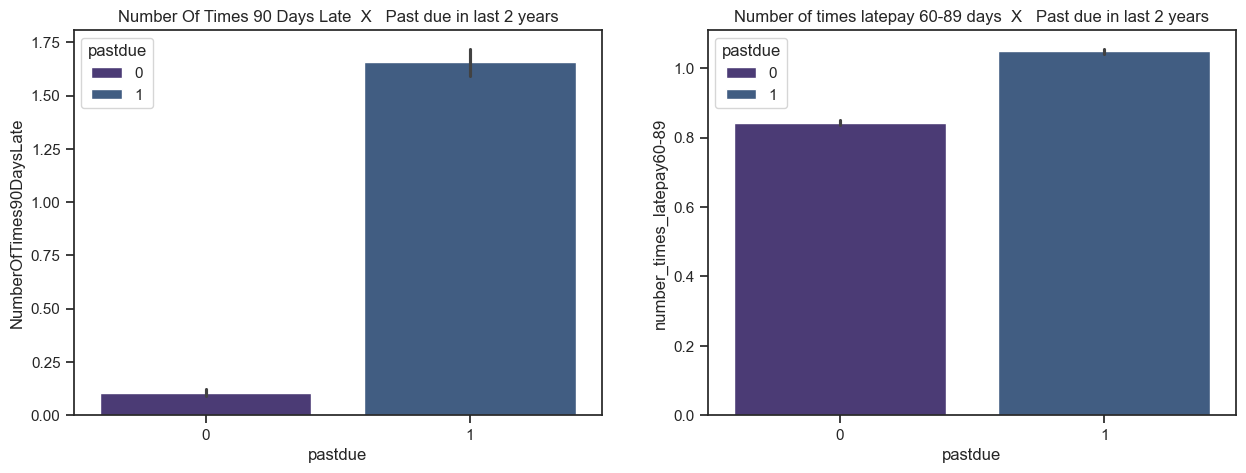

In [60]:

df_recurring= pd.DataFrame()
df_recurring['NumberOfTimes90DaysLate']= X_train['NumberOfTimes90DaysLate']
df_recurring['pastdue']= y_train
df_recurring['number_times_latepay60-89']= X_train.iloc[:, 8]
colors = sns.color_palette("viridis", n_colors=df_recurring['pastdue'].nunique())

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(df_recurring, x='pastdue', y='NumberOfTimes90DaysLate', ax= axs[0], hue='pastdue')
axs[0].set_title('Number Of Times 90 Days Late  X   Past due in last 2 years')
sns.barplot(df_recurring, x='pastdue', y='number_times_latepay60-89', ax= axs[1], hue='pastdue')
axs[1].set_title('Number of times latepay 60-89 days  X   Past due in last 2 years')

#### 4.7   -    Have people who have income less than 5000 owed any bills that has been expired for at least 90 days in the last two years?     


C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_8708\2063580838.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  notpast=X_train[X_train['MonthlyIncome']<5400][y_train==0].shape[0]
C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_8708\2063580838.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  past=X_train[X_train['MonthlyIncome']<5400][y_train==1].shape[0]


Text(0, 0.5, 'Count')

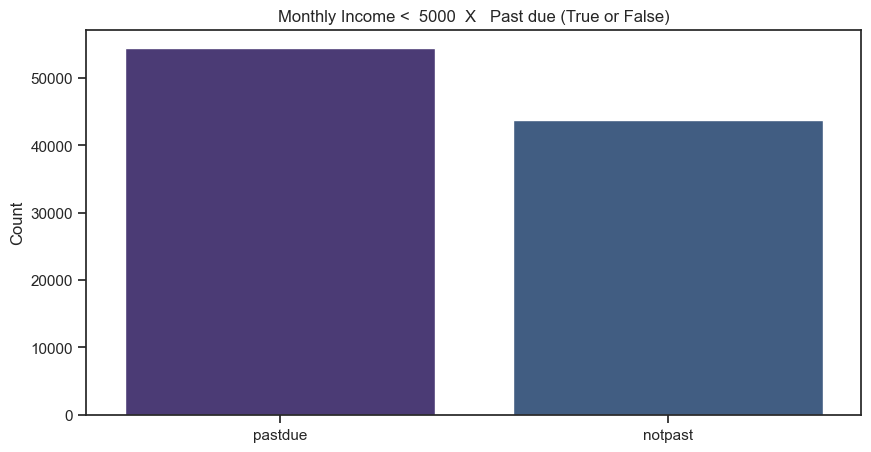

In [61]:

notpast=X_train[X_train['MonthlyIncome']<5400][y_train==0].shape[0]
past=X_train[X_train['MonthlyIncome']<5400][y_train==1].shape[0]
income_past= pd.DataFrame({'pastdue': past, 'notpast': notpast}, index=['quantity'])
plt.figure(figsize=(10,5))
sns.barplot(income_past)
plt.title('Monthly Income <  5000  X   Past due (True or False)')
plt.ylabel('Count')


#### 5.1 - Changing data type

In [36]:
columns_type= ['NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'number_times_latepay60-89',
       'NumberOfDependents']

X_train[columns_type] = X_train[columns_type].astype(np.int16)
y_train = y_train.astype(np.int8)
X_train['age'] = X_train['age'].astype(np.int8)


X_test[columns_type] = X_test[columns_type].astype(np.int16)
y_test = y_test.astype(np.int8)
X_test['age'] = X_test['age'].astype(np.int8)
pd.DataFrame(X_train.dtypes)


# Note we are reducing the bits usage of the features looking for a better perfomance. Some features as 'Age' doesn't need any bigger type than int8


,0
balance_divided_creditlimit,float64
age,int8
DebtRatio,float64
MonthlyIncome,float64
NumberOfOpenCreditLinesAndLoans,int16
NumberOfTimes90DaysLate,int16
NumberRealEstateLoansOrLines,int16
number_times_latepay60-89,int16
NumberOfDependents,int16


#### 5.2 -   Normalization

In [14]:

real_columns= X_train.columns
X_train= pd.DataFrame(normalize(X_train), columns=real_columns)
X_test = pd.DataFrame(normalize(X_test), columns=real_columns)
X_test

,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
0,0.000078,0.021918,0.000045,0.999747,0.004999,0.000000,0.000000,0.000000,0.000000
1,0.000122,0.011078,0.000118,0.999936,0.002031,0.000000,0.000554,0.000000,0.000000
2,0.000079,0.003242,0.000006,0.999995,0.000158,0.000237,0.000000,0.000079,0.000079
3,0.000290,0.014234,0.000325,0.999897,0.001452,0.000000,0.000290,0.000000,0.000581
4,0.000005,0.004221,0.000024,0.999991,0.000828,0.000000,0.000166,0.000000,0.000166
...,...,...,...,...,...,...,...,...,...
44727,0.000064,0.013885,0.000046,0.999902,0.001481,0.000000,0.000000,0.000000,0.000000
44728,0.000085,0.009264,0.000272,0.999954,0.002014,0.000000,0.001007,0.000000,0.000403
44729,0.000137,0.005788,0.000052,0.999982,0.001412,0.000000,0.000141,0.000000,0.000000
44730,0.000040,0.008666,0.000092,0.999956,0.003500,0.000167,0.000167,0.000000,0.000000


## 6.0 - Model Training

In [46]:
models_accuracy

,KNN,RForest,SVM,Neural Network


#### 6.1 -  KNN Classifier

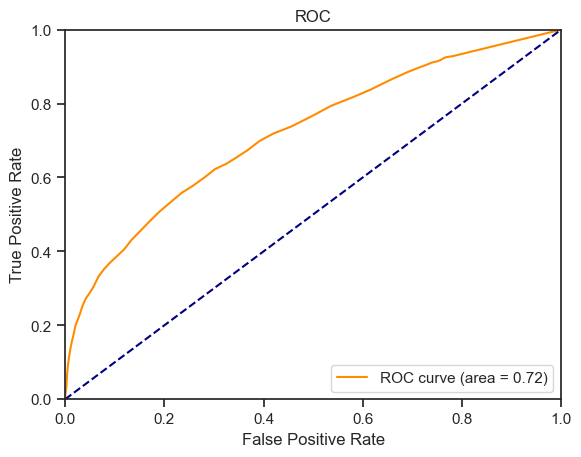

0.6602738504080995

In [45]:
models_accuracy = pd.DataFrame(columns=['KNN', 'RForest', 'SVM', 'Neural Network' ])
knn = KNeighborsClassifier(n_neighbors=50).fit(X_train, y_train)
y_knn_n = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_knn_n)



y_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob_knn)
roc_auc = metrics.roc_auc_score(y_test, y_prob_knn)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
accuracy_knn


#### 6.2 -  Random Florest Classifier

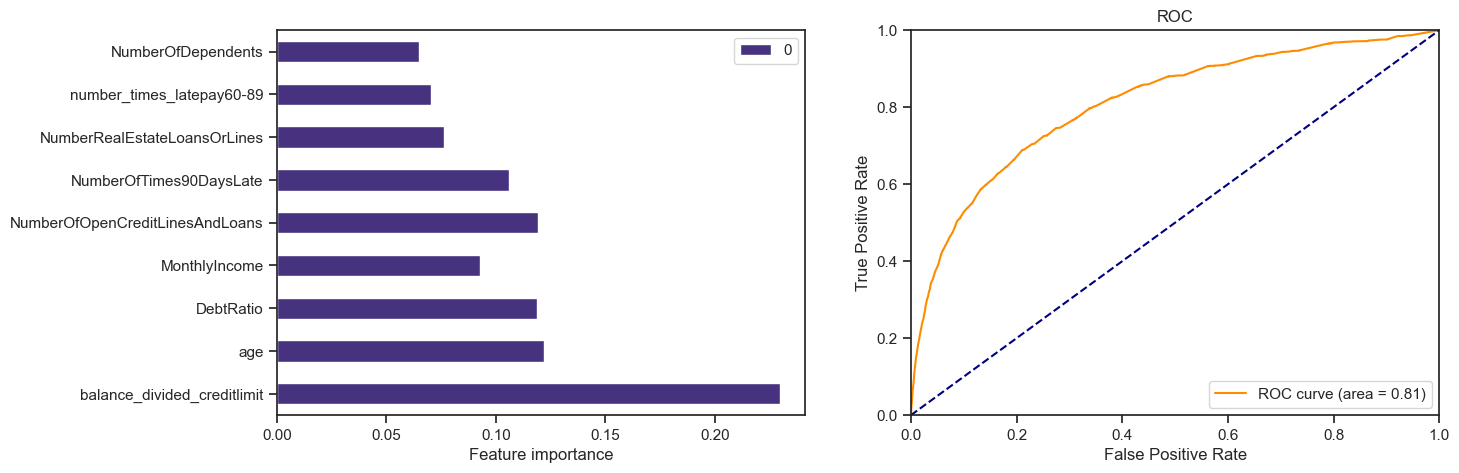

[[21914   452]
 [17213  5153]]
              precision    recall  f1-score   support

           0       0.56      0.98      0.71     22366
           1       0.92      0.23      0.37     22366

    accuracy                           0.61     44732
   macro avg       0.74      0.61      0.54     44732
weighted avg       0.74      0.61      0.54     44732



In [15]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
y_RFC= forest.predict(X_test)
accuracy_RFC= accuracy_score(y_test, y_RFC)

#Feature importance
importance = forest.feature_importances_
global_importances = pd.DataFrame(importance, index=X_train.columns)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))



#ROC GRAPH
y_pred_prob = forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
global_importances.plot.barh(ax=axs[0])
axs[0].set_xlabel('Feature importance')
axs[1].plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
axs[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.0])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC')
axs[1].legend(loc="lower right")

plt.show()
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_RFC))
print(classification_report(y_test, y_RFC))

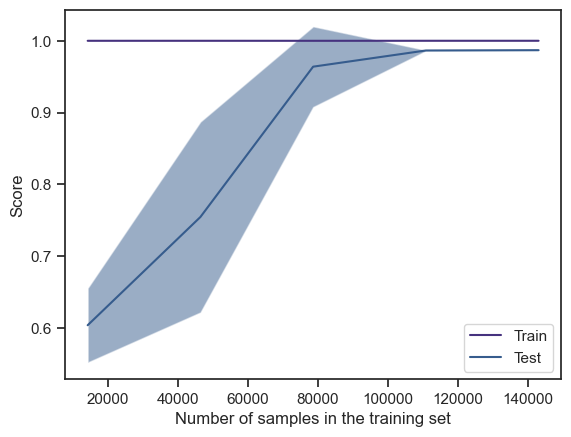

In [39]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    forest, X_train, y_train)
display = LearningCurveDisplay(train_sizes=train_sizes,
    train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()

#### 6.5 -  Neural networks

In [51]:
model =tf.keras.Sequential(
[tf.keras.layers.Input(shape=(9,)),
 tf.keras.layers.Dense(units=50, activation='relu', ),
 tf.keras.layers.Dense(units=100, activation='relu'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(units=50, activation='relu', ),
 tf.keras.layers.Dense(units=1, activation='sigmoid', )
]
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy',  metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
5596/5596 ━━━━━━━━━━━━━━━━━━━━ 4s 536us/step - accuracy: 0.5006 - loss: 6.1817
Epoch 2/5
5596/5596 ━━━━━━━━━━━━━━━━━━━━ 3s 537us/step - accuracy: 0.4983 - loss: 0.7784
Epoch 3/5
5596/5596 ━━━━━━━━━━━━━━━━━━━━ 3s 535us/step - accuracy: 0.5002 - loss: 0.6934
Epoch 4/5
5596/5596 ━━━━━━━━━━━━━━━━━━━━ 3s 534us/step - accuracy: 0.4998 - loss: 0.6934
Epoch 5/5
5596/5596 ━━━━━━━━━━━━━━━━━━━━ 3s 545us/step - accuracy: 0.5014 - loss: 0.6934


In [47]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 50)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,105 (125.41 KB)

 Trainable params: 10,701 (41.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,404 (83.61 KB)

In [27]:
y_nn=model.predict(X_test)

acc_NN= accuracy_score(y_test, y_nn )
print(f"Model Accuracy: {acc_NN}")

1400/1400 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step


0.5054265297007593

In [ ]:
def app(value):
    if value.argmax() == 0:
        return 0
    elif value.argmax() == 1:
        return 1
listest= []
for i in yhat_knn_new:

    listest.append(app(i))

acc_teste= np.array(listest)

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
print(y_test_rsld.shape)
from sklearn.metrics import accuracy_score


accuracy_score(y_test_rsld, acc_teste)

(44858,)


0.6631593026884837